In [6]:
!pip install noisereduce
!pip install librosa
!pip install soundfile
!pip install scipy
!pip install matplotlib

In [7]:
# import them
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import noisereduce as nr
from scipy import signal

In [32]:
# Fix the correct path with spaces
file_path = "../Echo/Sprint 1_ND/Event optimizing/audio/cat-goat-dingo.wav"

# Check if the path exists
print("Does the file exist:", os.path.exists(file_path))
print("Absolute path:", os.path.abspath(file_path))

# Check the contents of the Sprint 1_ND folder
print("\nContents of Sprint 1_ND folder:")
try:
    print(os.listdir("../Echo/Sprint 1_ND"))
except Exception as e:
    print(f"Error: {e}")


Does the file exist: True
Absolute path: C:\Users\Ryoma0729\Desktop\SIT374 Capstone Team Project (A)\Sprint2\Project-Echo\Echo\Sprint 1_ND\Event optimizing\audio\cat-goat-dingo.wav

Contents of Sprint 1_ND folder:
['Event optimizing', 'Unspervised model']


サンプリングレート: 22050
音声の長さ: 19.98 秒
データ点数: 440559


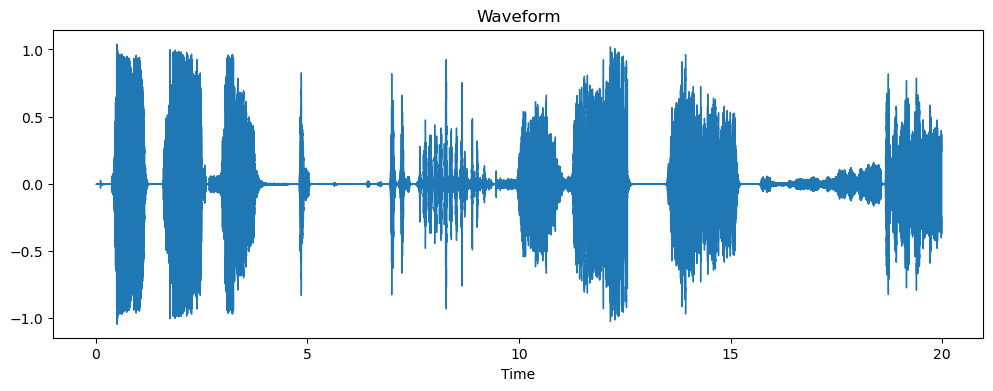

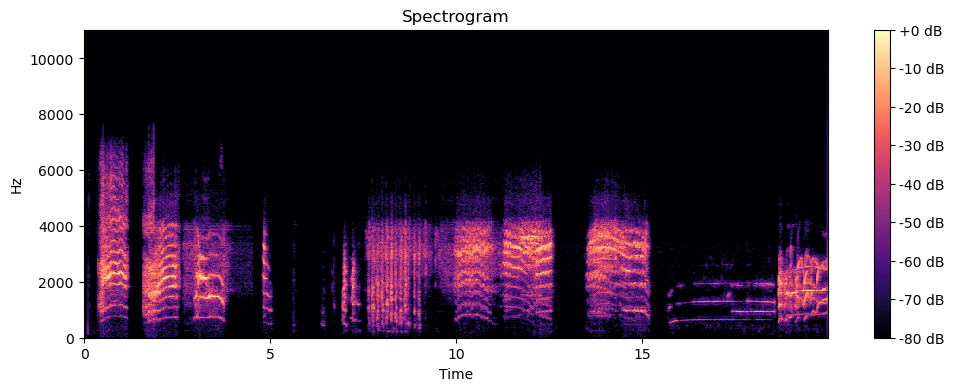

In [31]:
# Audio File Loading and Analysis
y_original, sr = load_and_analyze_audio(file_path)

Start Processing...
Input File: ../Echo/Sprint 1_ND/Event optimizing/audio/cat-goat-dingo.wav

Audio Quality Metrics：
SNR: 11.58 dB
Signal Energy Retention Rate: 75.1%


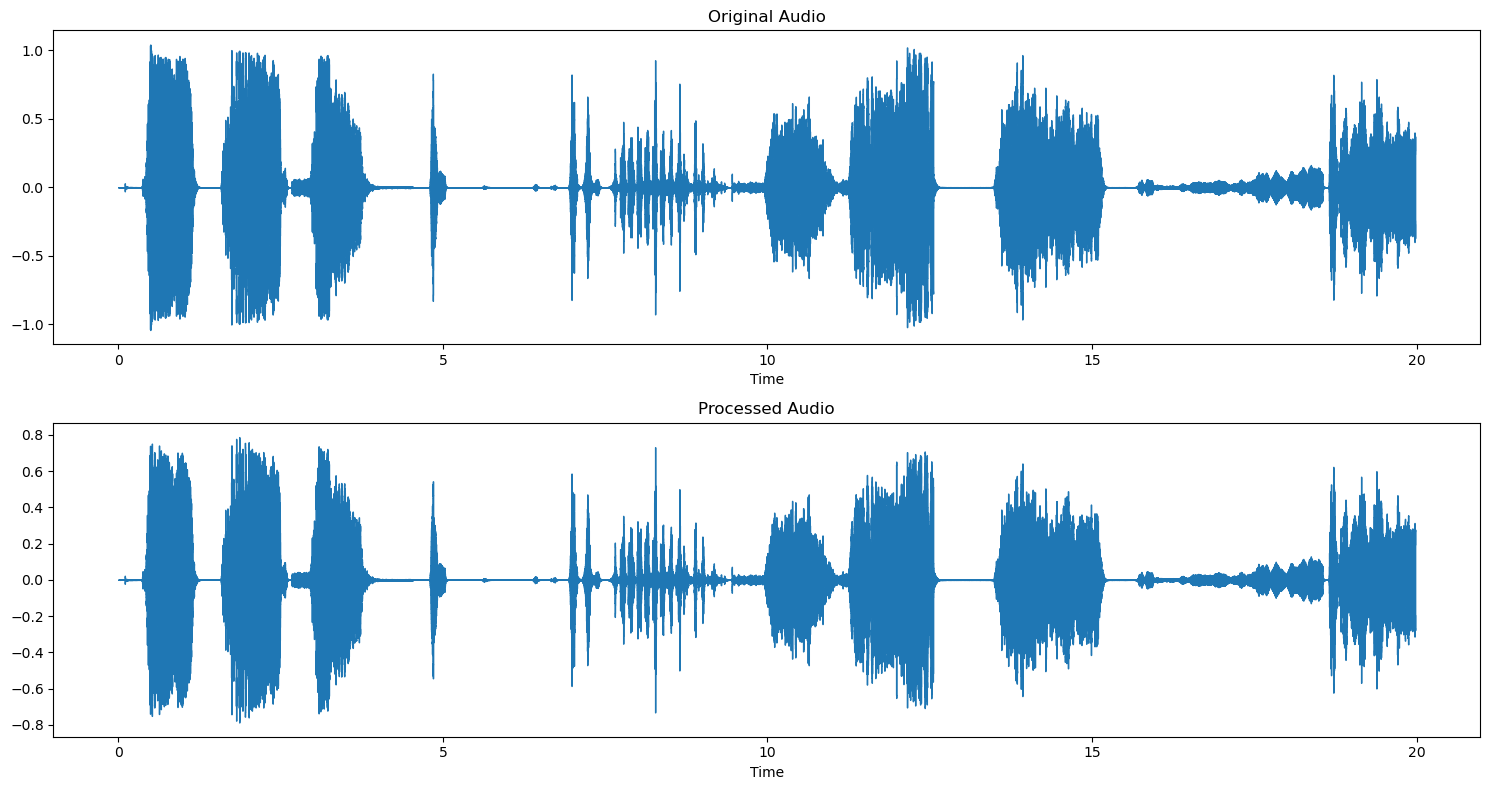

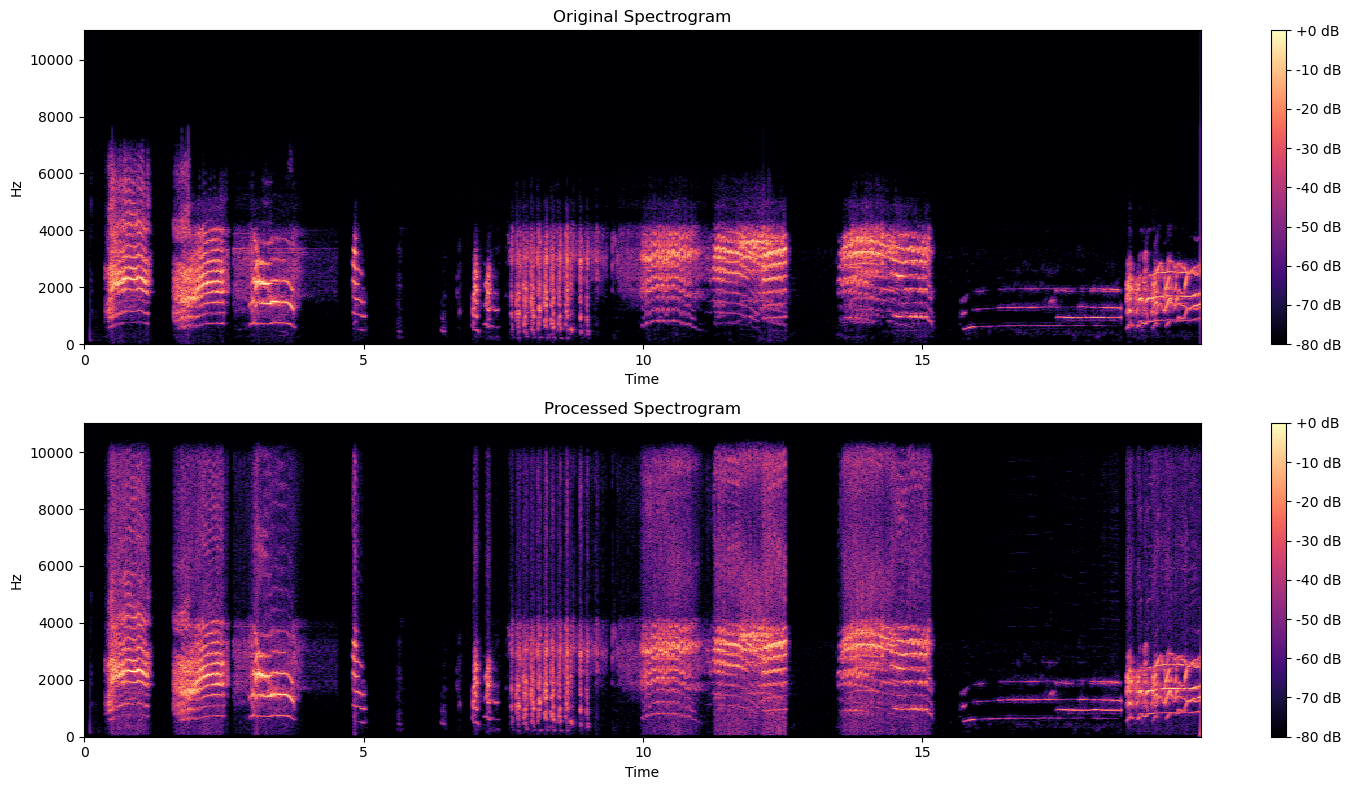


File Size Comparison:
Original File: 1248.8 KB
Processed File: 860.5 KB
Size Reduction Rate: 31.1%

Processed File Saved: processed_audio\enhanced_cat-goat-dingo_optimized.wav


In [30]:
def optimized_filter(y, sr):
    # Median Filter
    y_median = signal.medfilt(y, kernel_size=3)
    
    # Bandpass Filter
    nyquist = sr / 2
    cutoff_low = 50  # Retain Low Frequencie
    cutoff_high = 10000  # Retain High Frequencies
    b, a = signal.butter(4, [cutoff_low/nyquist, cutoff_high/nyquist], btype='band')
    y_filtered = signal.filtfilt(b, a, y_median)
    
    # Noise Reduction
    y_reduced = nr.reduce_noise(
        y=y_filtered,
        sr=sr,
        prop_decrease=0.2,  # Reduction
        stationary=True,
        n_std_thresh_stationary=3.5  # Conservatively
    )
    
    return y_reduced

def calculate_metrics(original, processed, sr):
    """Calculation of Evaluation Metrics"""
    # SNR Calculation
    noise = original - processed
    snr = 10 * np.log10(np.sum(original**2) / np.sum(noise**2))
    
    # Comparison of RMS Energy
    rms_original = np.sqrt(np.mean(original**2))
    rms_processed = np.sqrt(np.mean(processed**2))
    energy_retention = rms_processed / rms_original * 100
    
    return snr, energy_retention

def process_and_analyze_audio(file_path):
    """Analysis of Audio Processing and Its Results"""
    print("Start Processing...")
    print(f"Input File: {file_path}")
    
    # Load Audio
    y_original, sr = librosa.load(file_path)
    
    # Apply Filtering
    y_processed = optimized_filter(y_original, sr)
    
    # Calculate Evaluation Metrics
    snr, energy = calculate_metrics(y_original, y_processed, sr)
    print("\nAudio Quality Metrics：")
    print(f"SNR: {snr:.2f} dB")
    print(f"Signal Energy Retention Rate: {energy:.1f}%")
    
    # Waveform Visualization
    plt.figure(figsize=(15, 8))
    
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y_original, sr=sr)
    plt.title('Original Audio')
    
    plt.subplot(2, 1, 2)
    librosa.display.waveshow(y_processed, sr=sr)
    plt.title('Processed Audio')
    
    plt.tight_layout()
    plt.show()
    
    # Spectrogram Comparison
    plt.figure(figsize=(15, 8))
    
    plt.subplot(2, 1, 1)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y_original)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Original Spectrogram')
    
    plt.subplot(2, 1, 2)
    D_processed = librosa.amplitude_to_db(np.abs(librosa.stft(y_processed)), ref=np.max)
    librosa.display.specshow(D_processed, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Processed Spectrogram')
    
    plt.tight_layout()
    plt.show()
    
    # Save Processed Audio
    output_dir = "processed_audio"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    base_name = os.path.splitext(os.path.basename(file_path))[0]
    output_path = os.path.join(output_dir, f"enhanced_{base_name}_optimized.wav")
    sf.write(output_path, y_processed, sr)
    
    # File Size Comparison
    original_size = os.path.getsize(file_path)
    processed_size = os.path.getsize(output_path)
    size_reduction = (1 - processed_size/original_size) * 100
    
    print("\nFile Size Comparison:")
    print(f"Original File: {original_size/1024:.1f} KB")
    print(f"Processed File: {processed_size/1024:.1f} KB")
    print(f"Size Reduction Rate: {size_reduction:.1f}%")
    
    print(f"\nProcessed File Saved: {output_path}")
    
    return y_processed, sr

# Main Processing
if __name__ == "__main__":
    # Process Audio Files in Event Optimizing Folder
    file_path = "../Echo/Sprint 1_ND/Event optimizing/audio/cat-goat-dingo.wav"
    
    # Execute Processing
    y_processed, sr = process_and_analyze_audio(file_path)

Downloaded_sounds file

In [62]:
def optimized_filter(y, sr):
   """Optimize audio filtering with balanced size reduction and quality"""
   # Forced conversion from stereo to mono
   if len(y.shape) > 1:
       y = np.mean(y, axis=1)
   
   # Downsampling to 8kHz
   target_sr = 8000
   if sr != target_sr:
       y = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
       sr = target_sr

   # Bandpass filtering
   nyquist = sr / 2
   cutoff_low = 100   
   cutoff_high = 3500  # 音声の主要周波数を保持
   b, a = signal.butter(3, [cutoff_low/nyquist, cutoff_high/nyquist], btype='band')
   y_filtered = signal.filtfilt(b, a, y)

   # Noise reduction
   y_reduced = nr.reduce_noise(
       y=y_filtered,
       sr=sr,
       prop_decrease=0.03,
       n_fft=256,
       win_length=128,
       n_std_thresh_stationary=1.5
   )

   # Optimized amplitude normalization
   max_val = np.max(np.abs(y_reduced))
   if max_val > 0:
       y_normalized = y_reduced / max_val * 0.9 
   else:
       y_normalized = y_reduced
   
   return y_normalized, sr

def calculate_metrics(original, processed, sr_original, sr_processed):
   """Calculate audio quality metrics with proper resampling"""
   if sr_original != sr_processed:
       original = librosa.resample(original, orig_sr=sr_original, target_sr=sr_processed)

   min_len = min(len(original), len(processed))
   original = original[:min_len]
   processed = processed[:min_len]
   
   # Signal normalization
   original = original / (np.sqrt(np.mean(original**2)) + 1e-6)
   processed = processed / (np.sqrt(np.mean(processed**2)) + 1e-6)
   
   # SNR calculation
   noise = original - processed
   signal_power = np.mean(original**2)
   noise_power = np.mean(noise**2)
   snr = 10 * np.log10(signal_power / noise_power) if noise_power > 0 else 100
   
   # Energy retention rate calculation
   energy_retention = (np.sqrt(np.mean(processed**2)) / 
                      np.sqrt(np.mean(original**2))) * 100
   
   return snr, energy_retention

def process_single_file(input_path, output_path):
   """Process single audio file with optimized parameters"""
   # Load as mono
   y_original, sr_original = librosa.load(input_path, sr=None, mono=True)
   
   # Apply filtering
   y_processed, sr_processed = optimized_filter(y_original, sr_original)
   
   # Efficient quantization
   y_processed = np.clip(y_processed, -0.9, 0.9) * 32767
   y_processed = y_processed.astype(np.int16)
   
   # Compressed storage
   sf.write(output_path, y_processed, sr_processed, subtype='PCM_16', format='WAV')
   
   # Metrics calculation
   y_processed = y_processed.astype(float) / 32767
   snr, energy = calculate_metrics(y_original, y_processed, sr_original, sr_processed)
   
   return {
       'snr': snr,
       'energy_retention': energy,
       'original_size_kb': os.path.getsize(input_path)/1024,
       'processed_size_kb': os.path.getsize(output_path)/1024,
       'size_reduction_percent': ((os.path.getsize(input_path) - os.path.getsize(output_path)) 
                                / os.path.getsize(input_path) * 100)
   }

def process_audio_directory(input_dir, output_dir):
   """Process all audio files in directory with detailed reporting"""
   if not os.path.exists(output_dir):
       os.makedirs(output_dir)
   
   summary = []
   
   for filename in os.listdir(input_dir):
       if filename.lower().endswith('.wav'):
           print(f"Processing: {filename}")
           try:
               input_path = os.path.join(input_dir, filename)
               output_path = os.path.join(output_dir, f"optimized_{filename}")
               
               result = process_single_file(input_path, output_path)
               summary.append({'filename': filename, 'status': 'success', **result})
               print(f"Successfully processed: {filename}")
               
           except Exception as e:
               print(f"Error processing {filename}: {str(e)}")
               summary.append({
                   'filename': filename,
                   'status': 'error',
                   'error_message': str(e)
               })
   
   generate_summary_report(summary, output_dir)
   return summary

def generate_summary_report(summary, output_dir):
   """Generate detailed processing report"""
   report_path = os.path.join(output_dir, 'processing_summary.txt')
   
   with open(report_path, 'w', encoding='utf-8') as f:
       f.write("Audio Processing Summary Report\n")
       f.write("=" * 50 + "\n\n")
       
       successful_files = [s for s in summary if s['status'] == 'success']
       
       if successful_files:
           avg_snr = np.mean([s['snr'] for s in successful_files])
           avg_energy = np.mean([s['energy_retention'] for s in successful_files])
           avg_reduction = np.mean([s['size_reduction_percent'] for s in successful_files])
           
           f.write(f"Total processed files: {len(successful_files)}/{len(summary)}\n")
           f.write(f"Average SNR: {avg_snr:.2f} dB\n")
           f.write(f"Average Signal Retention: {avg_energy:.1f}%\n")
           f.write(f"Average Size Reduction: {avg_reduction:.1f}%\n\n")
       
       f.write("Individual File Results:\n")
       for result in summary:
           f.write(f"\nFile: {result['filename']}\n")
           if result['status'] == 'success':
               f.write(f"SNR: {result['snr']:.2f} dB\n")
               f.write(f"Signal Retention: {result['energy_retention']:.1f}%\n")
               f.write(f"Size Reduction: {result['size_reduction_percent']:.1f}%\n")
           else:
               f.write(f"Error: {result['error_message']}\n")

# Execution of main processing
if __name__ == "__main__":
   input_directory = r"C:\Users\Ryoma0729\Desktop\SIT374 Capstone Team Project (A)\Sprint2\Project-Echo\src\Prototypes\data\WebScrapeAndStoreSounds\Downloaded_sounds"
   output_directory = "processed_fox_sounds"
   
   print("Starting batch processing...")
   results = process_audio_directory(input_directory, output_directory)

Starting batch processing...
Processing: 12- steps fox.wav.wav
Successfully processed: 12- steps fox.wav.wav
Processing: 25-fox eats.wav.wav
Successfully processed: 25-fox eats.wav.wav
Processing: 26-angry fox.wav.wav
Successfully processed: 26-angry fox.wav.wav
Processing: 27-hungry fox.wav.wav
Successfully processed: 27-hungry fox.wav.wav
Processing: Alien Fox Bark.mp3.wav
Successfully processed: Alien Fox Bark.mp3.wav
Processing: Chris Fox KRLD.mp3.wav
Successfully processed: Chris Fox KRLD.mp3.wav
Processing: Cute Arctic White Fox Laughing Vine.mp3.wav
Successfully processed: Cute Arctic White Fox Laughing Vine.mp3.wav
Processing: Fox Barking.wav
Successfully processed: Fox Barking.wav
Processing: Fox Scream Mating Call.wav
Successfully processed: Fox Scream Mating Call.wav
Processing: Fox screaming in the night.mp3.wav
Successfully processed: Fox screaming in the night.mp3.wav
Processing: fox sex.wav
Successfully processed: fox sex.wav
Processing: Fox, Vocal Cry, Distant, 01.wav.w

In [63]:
# Display the contents of the summary file
with open('processed_fox_sounds/processing_summary.txt', 'r', encoding='utf-8') as f:
    print(f.read())

Audio Processing Summary Report

Total processed files: 15/15
Average SNR: 12.92 dB
Average Signal Retention: 100.0%
Average Size Reduction: 25.4%

Individual File Results:

File: 12- steps fox.wav.wav
SNR: -1.04 dB
Signal Retention: 100.1%
Size Reduction: 15.4%

File: 25-fox eats.wav.wav
SNR: 9.65 dB
Signal Retention: 100.0%
Size Reduction: 16.4%

File: 26-angry fox.wav.wav
SNR: 12.65 dB
Signal Retention: 100.0%
Size Reduction: 15.7%

File: 27-hungry fox.wav.wav
SNR: 9.41 dB
Signal Retention: 100.0%
Size Reduction: 16.5%

File: Alien Fox Bark.mp3.wav
SNR: 17.41 dB
Signal Retention: 100.0%
Size Reduction: 27.0%

File: Chris Fox KRLD.mp3.wav
SNR: 8.63 dB
Signal Retention: 100.0%
Size Reduction: 33.1%

File: Cute Arctic White Fox Laughing Vine.mp3.wav
SNR: 22.28 dB
Signal Retention: 100.0%
Size Reduction: 16.0%

File: Fox Barking.wav
SNR: 1.60 dB
Signal Retention: 100.0%
Size Reduction: 30.3%

File: Fox Scream Mating Call.wav
SNR: 14.16 dB
Signal Retention: 100.0%
Size Reduction: 25.6%

